In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

bnd=yf.download('BND',start="2015-01-01",end="2024-12-31")
bnd.index = bnd.index.date
bnd = bnd.reset_index().rename(columns={"index": "Date"})
bnd.to_csv("../data/bnd_data.csv")


[*********************100%***********************]  1 of 1 completed


In [2]:
BND_data=pd.read_csv("../data/bnd_data.csv")
BND_data.drop(columns={'Price'},index=0,axis=0,inplace=True)
BND_data['Date']=pd.to_datetime(BND_data['Date'])
BND_data['Close'] = pd.to_numeric(BND_data['Close'], errors='coerce')
BND_data.set_index('Date',inplace=True)
BND_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,63.358768463134766,82.650002,82.69000244140625,82.41999816894531,82.43000030517578,2218800
2015-01-05,63.54273986816406,82.889999,82.91999816894531,82.69999694824219,82.73999786376953,5820100
2015-01-06,63.726722717285156,83.129997,83.37999725341797,83.02999877929688,83.02999877929688,3887600
2015-01-07,63.76506042480469,83.180000,83.27999877929688,83.05000305175781,83.13999938964844,2433400
2015-01-08,63.66542434692383,83.050003,83.11000061035156,82.97000122070312,83.11000061035156,1873400


In [3]:
BND_data.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Test Statistics: -0.8061825550320926
p-Value: 0.8172992394093174
Lag used: 13
Number of observation: 13
Critical Values': {'1%': np.float64(-3.4330045498933544), '5%': np.float64(-2.8627127589354426), '10%': np.float64(-2.567394306200992)}
Conclusion: Non-Stationary


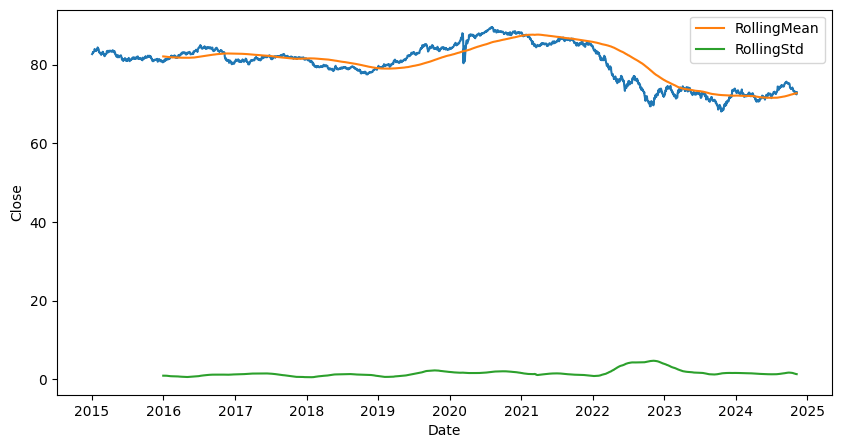

In [4]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df,col):
    df["rollingMean"]=df[col].rolling(window=252).mean()
    df["rollingStd"]=df[col].rolling(window=252).std()
    result=adfuller(df[col],autolag="AIC")
    
    print(f"Test Statistics: {result[0]}")
    print(f"p-Value: {result[1]}")
    print(f"Lag used: {result[2]}")
    print(f"Number of observation: {result[2]}")
    print(f"Critical Values': {result[4]}")
    print(f"Conclusion: {'Stationary' if result[1] < 0.05 else 'Non-Stationary'}")
    
    plt.figure(figsize=(10,5))
    sns.lineplot(df,x=df.index,y=df[col])
    sns.lineplot(df,x=df.index,y=df["rollingMean"],label="RollingMean")
    sns.lineplot(df,x=df.index,y=df["rollingStd"],label="RollingStd")
    plt.legend()
    
check_stationarity(BND_data,'Close')